# Exercise Modul 3: Preprocessing

Pada exercise kali ini kita akan menggunakan beberapa metode yang telah kita pelajari:

- Input missing value
- Encoding
- Scaling
- Regularization


<br>- Feature: 'Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Regionname','Propertycount'
<br>- Target: 'Price'

Yang dilakukan pada preprocessing dan modeling:
- Ada 4 feature yang mengandung missing value. Isi missing value tsb dengan imputer yang sesuai dengan karakter masing-masing feature/kolomnya.
- Ada 5 feature categorical. Lakukan Encoding pada features tersebut sesuai dengan karakter masing-masing feature/kolomnya.
- Scaling semua feature. Pilih scaler yang menurut kamu paling cocok
- Lakukan prediksi dengan metode Lasso pada data yang sudah siap 


In [62]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# akurasi
from sklearn.metrics import mean_squared_error

# Model
from sklearn.linear_model import Lasso
import statsmodels.api as sm 

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
pd.set_option('display.max_columns',None)
raw = pd.read_csv('data/melb_data.csv')
df = raw.copy()
df


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Exploring Data

In [64]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [65]:
x = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Regionname','Propertycount']]
y = df['Price']

In [66]:
x.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot:>

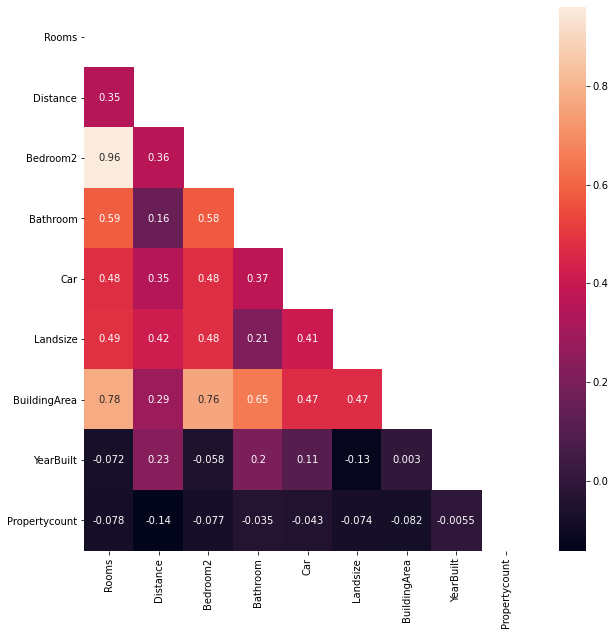

In [67]:
mtx = np.triu(x.corr())
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(method='spearman'), annot=True,mask=mtx)

In [68]:
x

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,S,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,SP,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,Western Metropolitan,6380.0
13577,Williamstown,3,h,S,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,Western Metropolitan,6380.0
13578,Williamstown,4,h,PI,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,Western Metropolitan,6380.0


### 1. Input Missing Value

#### a. Car

Fill null with car's median = 2

In [69]:
x['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [70]:
x['Car'].isna().sum()

62

In [71]:
x_dropna = x.copy()
x_dropna = x_dropna.dropna()
a = x_dropna[['Rooms', 'Distance', 'Bedroom2', 'Bathroom']]
b = pd.DataFrame(x_dropna['Car'])

a = sm.add_constant(a)
a

C:\Users\62812\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Rooms,Distance,Bedroom2,Bathroom
1,1.0,2,2.5,2.0,1.0
2,1.0,3,2.5,3.0,2.0
4,1.0,4,2.5,3.0,1.0
6,1.0,3,2.5,4.0,2.0
7,1.0,2,2.5,2.0,1.0
...,...,...,...,...,...
12205,1.0,3,35.5,3.0,2.0
12206,1.0,3,6.8,3.0,1.0
12207,1.0,1,6.8,1.0,1.0
12209,1.0,2,4.6,2.0,1.0


In [72]:
model = sm.OLS(b,a.astype('float64'))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Car   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     435.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:03:26   Log-Likelihood:                -7572.6
No. Observations:                6196   AIC:                         1.516e+04
Df Residuals:                    6191   BIC:                         1.519e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1836      0.035      5.234      0.0

model = 0.1836 + 0.1274xRooms + 0.0283xDistance + 0.1591xBedroom2 + 0.1770xBathroom

In [73]:
# x[x['Car'].isna()]

x['Car'] = x.apply(
    lambda row: round(0.1836+ (0.1274*row['Rooms']) + (0.0283*row['Distance']) + (0.1591*row['Bedroom2']) + (0.1770*row['Bathroom'])) 
    if np.isnan(row['Car']) else row['Car'],
    axis=1
)

# x['Car'].unique()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [74]:
x['Car'].value_counts()

2.0     5604
1.0     5558
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [75]:
# sns.displot(x['Car'])

In [76]:
# sns.displot(result.resid)

In [77]:
# x['Car'].median()

In [78]:
# car_unique = x['Car'].dropna().unique()
# car_unique

In [79]:
# cnt_car = x['Car'].value_counts()
# cnt_car

In [80]:
# sns.displot(x['Car'])

In [81]:
# x['Car'].fillna(value=x['Car'].median(), inplace=True)
# x['Car'].isna().sum()

#### b. Building Area

Fill null with Building Area's mean

In [82]:
a = x_dropna[['Rooms','Bedroom2']]
b = x_dropna['BuildingArea']

a = sm.add_constant(a)

C:\Users\62812\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [83]:
model = sm.OLS(b,a.astype('float64'))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           BuildingArea   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     1835.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:03:26   Log-Likelihood:                -35288.
No. Observations:                6196   AIC:                         7.058e+04
Df Residuals:                    6193   BIC:                         7.060e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.8191      2.930     -9.153      0.0

In [84]:
x['BuildingArea'] = x.apply(
    lambda row : -26.8191+(43.5449*row['Rooms'])+(14.0384*row['Bedroom2'])
    if np.isnan(row['BuildingArea']) else row['BuildingArea'],
    axis=1
)
x['BuildingArea'].isna().sum()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0

In [85]:
x['BuildingArea'].unique()

array([8.834750e+01, 7.900000e+01, 1.500000e+02, 1.459308e+02,
       1.420000e+02, 2.100000e+02, 1.070000e+02, 3.076420e+01,
       7.500000e+01, 1.900000e+02, 9.400000e+01, 9.700000e+01,
       1.100000e+02, 1.050000e+02, 7.300000e+01, 1.350000e+02,
       2.700000e+01, 6.000000e+01, 8.500000e+01, 1.740000e+02,
       5.000000e+01, 1.280000e+02, 2.035141e+02, 1.800000e+01,
       1.240000e+02, 9.100000e+01, 8.200000e+01, 8.100000e+01,
       2.250000e+02, 1.450000e+02, 8.400000e+01, 1.340000e+02,
       1.160000e+02, 8.600000e+01, 1.318924e+02, 1.270000e+02,
       1.860000e+02, 9.000000e+01, 1.330000e+02, 1.300000e+02,
       2.330206e+02, 1.130000e+02, 1.000000e+02, 3.090000e+02,
       1.920000e+02, 1.260000e+02, 1.010000e+02, 1.020000e+02,
       7.600000e+01, 1.460000e+02, 1.980000e+02, 7.430910e+01,
       1.800000e+02, 1.590000e+02, 1.220000e+02, 1.810000e+02,
       2.610974e+02, 9.800000e+01, 8.300000e+01, 1.470000e+02,
       2.540000e+02, 1.230000e+02, 1.310000e+02, 3.4000

In [86]:
# mean_ba = x['BuildingArea'].mean()

In [87]:
# x['BuildingArea'].fillna(value=mean_ba,inplace=True)
# x['BuildingArea'].isna().sum()

#### c. Year Built

Fill null with Year Built's median

In [88]:
x['YearBuilt'].unique()

array([  nan, 1900., 2014., 1910., 1890., 2005., 2009., 1880., 1985.,
       2010., 1970., 2013., 2012., 1920., 1950., 1998., 1930., 2016.,
       1965., 1980., 2011., 2015., 1975., 1993., 1960., 2003., 1995.,
       1996., 2000., 1925., 2004., 2008., 1962., 1955., 1988., 1953.,
       1997., 1990., 2007., 1967., 1964., 1889., 1888., 2006., 1934.,
       1935., 1966., 1969., 1940., 1938., 1887., 1904., 1972., 1978.,
       1939., 1945., 1947., 1958., 2017., 1999., 1992., 1961., 1928.,
       1977., 1976., 2001., 1948., 1927., 1981., 1943., 1974., 1968.,
       1957., 1987., 1986., 1926., 2002., 1994., 1949., 1905., 1912.,
       1924., 1952., 1991., 1942., 1973., 1915., 2018., 1916., 1982.,
       1971., 1963., 1897., 1989., 1919., 1923., 1983., 1903., 1830.,
       1895., 1937., 1908., 1913., 1917., 1885., 1902., 1854., 1850.,
       1898., 1941., 1951., 1946., 1956., 1984., 1901., 1959., 1979.,
       1933., 1886., 1929., 1906., 1870., 1932., 1875., 1863., 1918.,
       1893., 1856.,

In [89]:
x['YearBuilt'].median()

1970.0

In [90]:
x['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1933.0      1
1830.0      1
1901.0      1
1857.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [91]:
x['YearBuilt'].fillna(value='1970',inplace=True)
x['YearBuilt'].isna().sum()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

#### d. Council Area

Fill null with Council Area's mod

In [92]:
x['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [93]:
x['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: CouncilArea, dtype: int64

In [94]:
x['CouncilArea'].fillna(value='Moreland', inplace=True)
x['CouncilArea'].isna().sum()

0

## 2. Encoding

In [95]:
x.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [96]:
x

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,88.3475,1970,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,145.9308,1970,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0000,2014.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,S,16.7,4.0,2.0,2.0,652.0,203.5141,1981.0,Moreland,South-Eastern Metropolitan,7392.0
13576,Williamstown,3,h,SP,6.8,3.0,2.0,2.0,333.0,133.0000,1995.0,Moreland,Western Metropolitan,6380.0
13577,Williamstown,3,h,S,6.8,3.0,2.0,4.0,436.0,145.9308,1997.0,Moreland,Western Metropolitan,6380.0
13578,Williamstown,4,h,PI,6.8,4.0,1.0,5.0,866.0,157.0000,1920.0,Moreland,Western Metropolitan,6380.0


#### a. Type

Ganti Type h=0, u=1, t=2

In [97]:
# x['Type'].unique()

In [98]:
# x['Type'] = np.where(x['Type']=='h',0,x['Type'])
# x['Type'] = np.where(x['Type']=='u',1,x['Type'])
# x['Type'] = np.where(x['Type']=='t',2,x['Type'])

# # x['Type'] = x['Type'].astype(dtype='float64')
# x['Type']

#### b. Method

In [99]:
# x['Method'].unique()

In [100]:
# x['Method'] = np.where(x['Method']=='S',1,x['Method'])
# x['Method'] = np.where(x['Method']=='SP',2,x['Method'])
# x['Method'] = np.where(x['Method']=='PI',3,x['Method'])
# x['Method'] = np.where(x['Method']=='VB',4,x['Method'])
# x['Method'] = np.where(x['Method']=='SA',5,x['Method'])

# x['Method'] = x['Method'].astype('float64')
# x['Method']

#### c. Council Area

In [101]:
# dalam = np.array(['Yarra','Port Phillip', 'Stonnington', 'Melbourne'])
# metropolitan = np.array(['Banyule', 'Bayside', 'Boroondara', 'Darebin', 'Glen Eira', 'Kingston', 
#                   'Manningham', 'Maribyrnong', 'Maroondah', 'Monash', 'Moonee Valley',
#                   'Moreland', 'Whitehorse', 'Hobsons Bay'])
# luar = np.array(['Brimbank', 'Cardinia', 'Casey', 'Frankston','Greater Dandenong',  'Hume', 'Knox',
#                   'Melton',  'Nillumbik', 'Whittlesea', 'Wyndham',  'Yarra Ranges'])
# unknown = np.array(['Macedon Ranges','Unavailable', 'Moorabool'])
# x['CouncilArea'] = np.where(x['CouncilArea'].isin(dalam),'inside',x['CouncilArea'])
# x['CouncilArea'] = np.where(x['CouncilArea'].isin(metropolitan),'metropolitan',x['CouncilArea'])
# x['CouncilArea'] = np.where(x['CouncilArea'].isin(luar),'outside',x['CouncilArea'])
# x['CouncilArea'] = np.where(x['CouncilArea'].isin(unknown),'unknown',x['CouncilArea'])
# x['CouncilArea'].unique()

In [102]:
# x = pd.concat([x,pd.get_dummies(x['CouncilArea'])],axis=1)
# x.drop(columns=['CouncilArea'], inplace=True)
# x

#### d. Region Name

In [103]:
# x['Regionname'].unique()

In [104]:
# x = pd.concat([x,pd.get_dummies(x['Regionname'])],axis=1)
# x.drop(columns=['Regionname'],inplace=True)
# x

#### e. Suburb

In [105]:
# from sklearn import preprocessing
# label_encoder_Suburb = preprocessing.LabelEncoder()
# x['Suburb']= label_encoder_Suburb.fit_transform(x['Suburb'])

# label_encoder_Type = preprocessing.LabelEncoder()
# x['Type']= label_encoder_Type.fit_transform(x['Type'])

# label_encoder_Method = preprocessing.LabelEncoder()
# x['Method']= label_encoder_Method.fit_transform(x['Method'])

# label_encoder_SellerG = preprocessing.LabelEncoder()
# x['CouncilArea']= label_encoder_SellerG.fit_transform(x['CouncilArea'])

# label_encoder_RegionName = preprocessing.LabelEncoder()
# x['Regionname']= label_encoder_RegionName.fit_transform(x['Regionname'])

# x['Regionname'].unique()

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


array([2, 6, 5, 0, 4, 1, 3, 7])

In [ ]:
# PREPROCESSING
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer # untuk transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split


In [ ]:
# binary+simpleimputer(mode)
binary_simp = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# encoding
transformer = ColumnTransformer([
    ('imputer', IterativeImputer(), ['Car','BuildingArea','YearBuilt']),
    ('onehot', OneHotEncoder(drop='first'), ['Type','Method']),
    ('binary', ce.BinaryEncoder(), ['Suburb','Regionname']),
    ('binary_simp', binary_simp, ['CouncilArea'])
], remainder='passthrough')

In [121]:
x['Suburb'].unique()

array([  0,   2,   4,   6,   7,   9,  11,  12,  13,  14,  18,  20,  21,
        22,  29,  30,  38,  39,  41,  42,  46,  48,  49,  55,  58,  60,
        62,  63,  67,  69,  70,  71,  79,  80,  81,  82, 103, 108, 111,
       114, 118, 119, 121, 124, 125, 126, 127, 136, 138, 139, 142, 144,
       145, 147, 152, 153, 157, 160, 163, 166, 169, 170, 171, 178, 183,
       184, 185, 186, 189, 195, 199, 202, 203, 212, 213, 215, 217, 220,
       223, 228, 229, 232, 233, 234, 236, 237, 244, 253, 257, 259, 260,
       261, 266, 267, 270, 271, 272, 273, 279, 282, 283, 290, 296, 300,
       305, 306, 307, 311, 313,   1,  28,  47,  52,  59,  61, 109, 120,
       122, 148, 151, 161, 162, 175, 176, 209, 225, 299,   5,  45, 135,
       221, 242,  87, 102, 256, 268, 284,  68, 252, 168, 132, 235,  23,
        24,  27,  31,  37,  40,  43,  51,  54,  56,  57,  64,  74,  84,
        85,  88,  93,  94,  99, 101, 104, 105, 106, 112, 117, 128, 129,
       130, 131, 133, 134, 140, 143, 149, 154, 155, 158, 165, 16

In [106]:
x_num = x[['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount']]
x_cat = x[['Suburb','Type','Method','YearBuilt','CouncilArea','Regionname']]

### 3. Scaling

In [107]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 1899
)

In [108]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 4. Lasso

In [109]:
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
train = []
test = []
score = 1000000000000
best_alpha=0
for i in hyperparam_alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(x_train_scaled,y_train)
    
    y_train_pred = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train.append(mse_train)
    
    y_test_pred = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
test
print("best mse {}, best alpha {}".format(score,best_alpha))

best mse 203432510633.53668, best alpha 1000


In [110]:
pd.DataFrame(
    {
        'alpha': hyperparam_alpha,
        'train MSE': train,
        'test MSE': test
    }
)

,alpha,train MSE,test MSE
0,100000.000000,3.993346e+11,3.891532e+11
1,10000.000000,2.480371e+11,2.380811e+11
2,1000.000000,2.124755e+11,2.034325e+11
3,100.000000,2.105554e+11,2.099264e+11
4,10.000000,2.104175e+11,2.129117e+11
5,1.000000,2.104161e+11,2.132401e+11
6,0.100000,2.104161e+11,2.132732e+11
7,0.010000,2.104161e+11,2.132765e+11
8,0.001000,2.104161e+11,2.132769e+11
9,0.000100,2.104161e+11,2.132769e+11


C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anacond

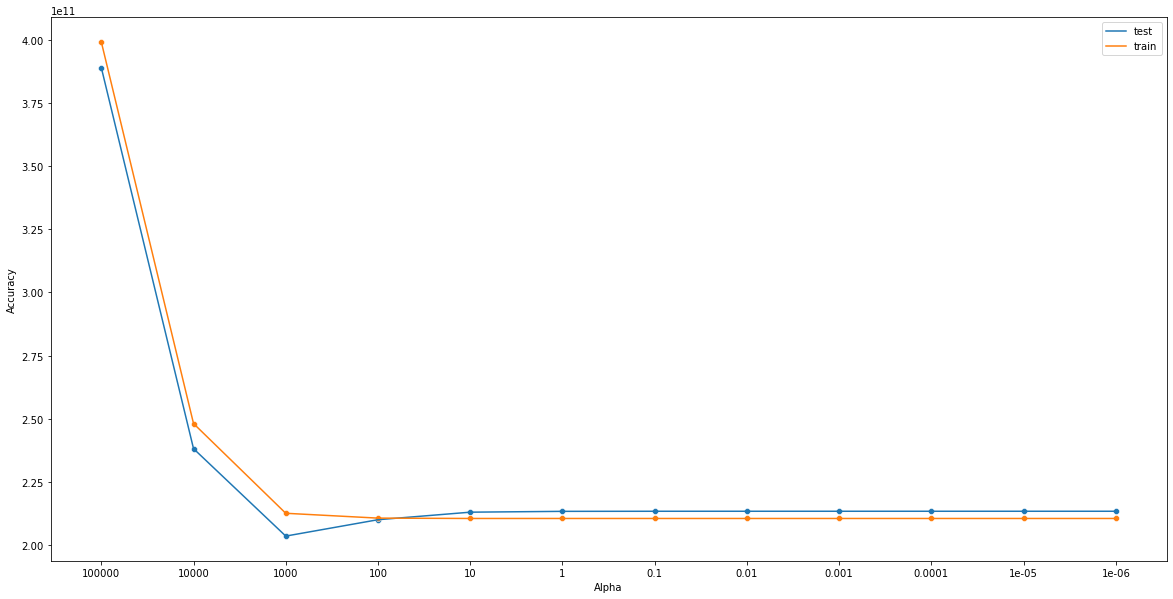

In [119]:
length = range(len(hyperparam_alpha))

plt.figure(figsize=(20,10))

sns.lineplot(length,test)
sns.scatterplot(length,test)

sns.lineplot(length,train)
sns.scatterplot(length,train)

plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.xticks(length,hyperparam_alpha)

plt.legend(['test','train'])
plt.show()